In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dedalus.public as de
import atmospheres as atmos
%matplotlib notebook

In [2]:
# Parameters
# Box
Lz = 2
# Atmosphere
γ = 5/3
g = 1
p_bottom = 1
ρ_bottom = 1
# Cavity
zcb = 0.5
zct = 1.5
N2_amp = 0.2**2

# def N2_func(z):
#     # Quadratic buoyancy profile in cavity
#     zc = (z - zcb) / (zct - zcb)
#     if 0 < zc < 1:
#         return N2_amp * zc * (1 - zc) / (1 / 2)**2
#     else:
#         return 0
    
def N2_func(z):
    # Gaussian cavity
    zc0 = (zcb + zct) / 2
    zcw = (zct - zcb) / 2 / 3
    zc = (z - zc0) / zcw
    return N2_amp * np.exp(-zc**2/2)

In [3]:
X0 = np.array([p_bottom, -ρ_bottom*g])
z = np.linspace(0, Lz, 1000)
P = (N2_func, g, γ)
p, pz = atmos.solve_scipy(X0, P, z)

ρ = -pz / g
RT = p / ρ
H = -p / pz
cs2 = γ * p / ρ
ωc = np.sqrt(cs2) / 2 / H
N2 = np.array([N2_func(zi) for zi in z])

<IPython.core.display.Javascript object>


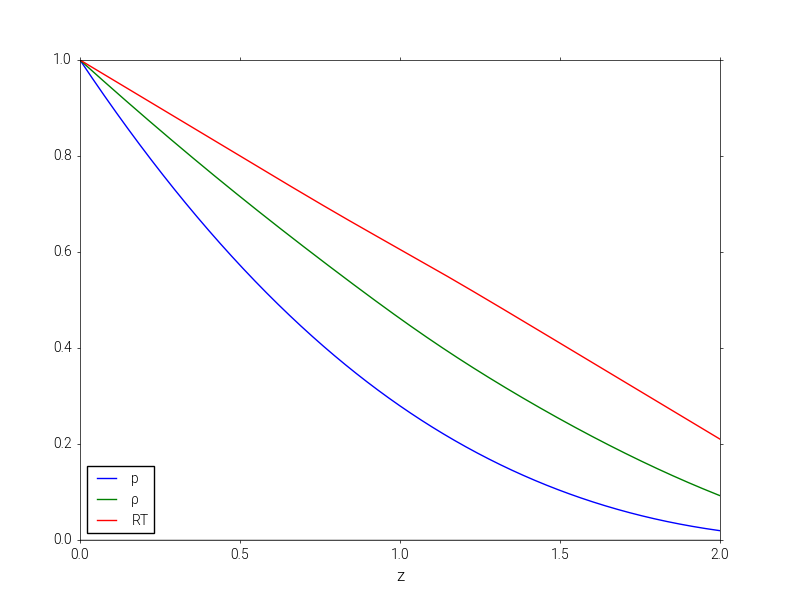

In [5]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(z, p, label='p')
axes.plot(z, ρ, label='ρ')
axes.plot(z, RT, label='RT')
#axes.axvspan(Lz+Ls/2, Lz+Ls, alpha=0.2, color='k')
axes.axhline(0, c='k')
axes.set_xlabel('z')
axes.legend(loc='lower left')
#axes.set_ylim(0, None)

<IPython.core.display.Javascript object>


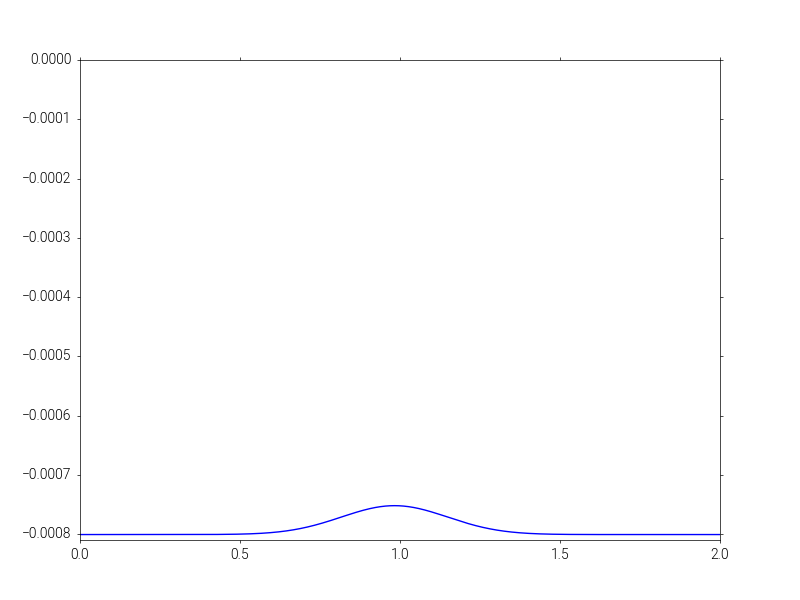

(-0.00080999999999999996, 0)

In [7]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(z, np.gradient(RT))
axes.set_ylim(None, 0)

<IPython.core.display.Javascript object>


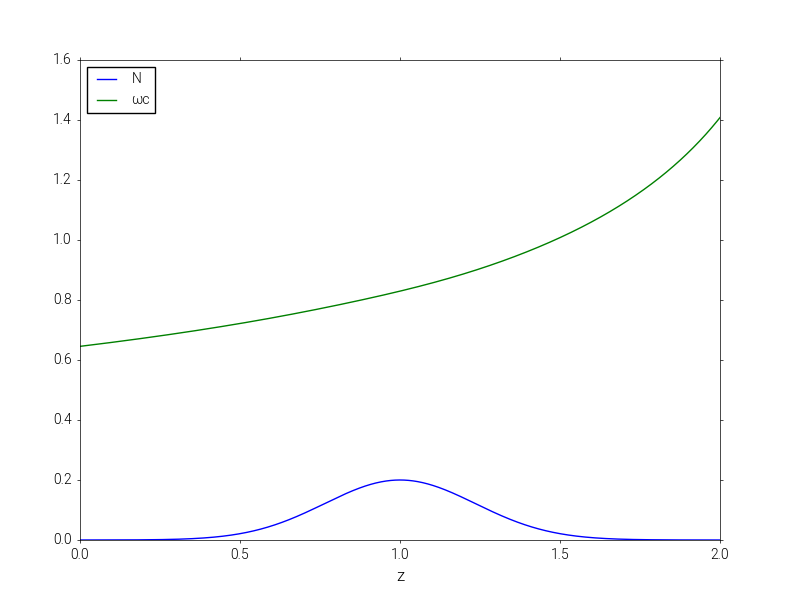

(0, 1.6000000000000001)

In [8]:
fig = plt.figure()
axes = fig.add_subplot(1,1,1)
axes.plot(z, N2**0.5, label='N')
axes.plot(z, ωc, label='ωc')
#axes.axvspan(Lz+Ls/2, Lz+Ls, alpha=0.2, color='k')
axes.set_xlabel('z')
axes.legend(loc='upper left')
axes.set_ylim(0, None)